In [1]:
import pandas as pd
import datetime as dt


In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
dataset=pd.read_csv("Quality data Preprocessed data.csv")

In [4]:
dataset

,Product,Time,Equipment,Char A,Char B,Char C,Char D,Char E,Char A6,Char A7,Char A8,Char A9,Char A10,Class
0,Product-1,2022-09-05,B1,82,17,12,126,119,B,C,A,H,H,H
1,Product-2,2022-09-05,B1,96,13,13,72,42,B,B,A,B,B,B
2,Product-3,2022-09-05,B1,60,12,13,56,33,B,B,A,B,B,B
3,Product-4,2022-09-05,B1,53,12,11,45,21,B,B,A,B,A,B
4,Product-5,2022-09-05,B1,56,12,17,49,26,B,B,B,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,Product-5640,2023-04-20,B1,84,3,14,63,61,B,A,B,B,C,C
5640,Product-5641,2023-04-20,B4,52,2,12,42,20,B,A,A,B,A,B
5641,Product-5642,2023-04-20,B4,56,2,9,66,39,B,A,A,B,B,B
5642,Product-5643,2023-04-20,B1,51,3,13,67,43,B,A,A,B,B,B


In [5]:
dataset.columns

Index(['Product', 'Time', 'Equipment', 'Char A', 'Char B', 'Char C', 'Char D',
       'Char E', 'Char A6', 'Char A7', 'Char A8', 'Char A9', 'Char A10',
       'Class'],
      dtype='object')

In [6]:
#dataset=dataset[['Char A', 'Char B', 'Char C', 'Char D','Char E']]

In [7]:
#dataset

In [8]:
startdate="2015-09-05"
enddate="2023-04-20"
df=dataset[dataset['Time'].between(startdate,enddate)][['Time', 'Char E']]

In [9]:
df

,Time,Char E
0,2022-09-05,119
1,2022-09-05,42
2,2022-09-05,33
3,2022-09-05,21
4,2022-09-05,26
...,...,...
5639,2023-04-20,61
5640,2023-04-20,20
5641,2023-04-20,39
5642,2023-04-20,43


In [10]:
column='Char E'

In [11]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(df[[column]])
print("Len:",data1.shape)

Len: (5644, 1)


In [12]:
len(data1)

5644

In [13]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

4515
X_train length: (4515, 1)
X_test length: (1129, 1)
y_train length: (4515, 1)
y_test length: (1129, 1)


In [14]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(df), len(df)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP['Char E'])"""

"from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(df), len(df)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP['Char E'])"

In [15]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.1447659433796477
maPe-Testset: 479174703458.65027
RMSE-Testset: 0.14496312734392763
maPe-Testset: 462425820300.1943
RMSE-Testset: 0.22225823619436794
maPe-Testset: 668780763071.8281


C:\Users\Hi\anaconda3\envs\aiads\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.14575653594878776
maPe-Testset: 473718347888.99414


In [16]:
df.columns

Index(['Time', 'Char E'], dtype='object')

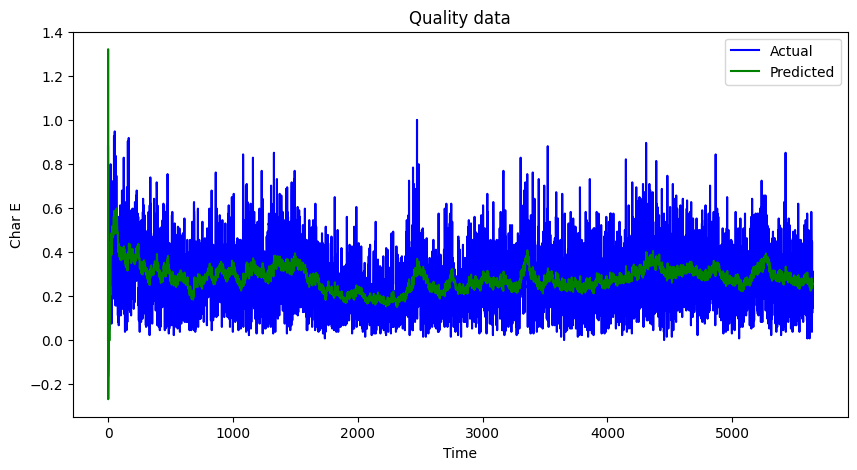

In [17]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Quality data","Time","Char E")

In [18]:
len(data1)

5644

In [19]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Char E"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Char E"])

In [20]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Char E"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Char E"])

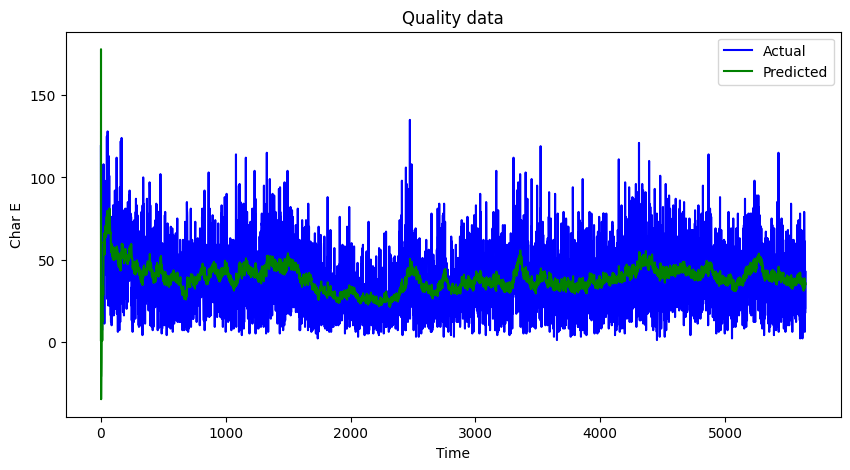

In [21]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Quality data","Time","Char E")

In [22]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 19.531375817137558
maPe-Testset: 0.6848890406953195


In [23]:
forecast=model_fit.predict(len(data1), len(data1)+10)

In [24]:
forecast

array([0.24498992, 0.24530997, 0.24940429, 0.24963081, 0.24976522,
       0.24976018, 0.24974391, 0.24972215, 0.24969969, 0.24967699,
       0.24965426])

In [25]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CharEforecast"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["CharEforecast"])

In [26]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [27]:
forecast_stock_price_test_oriF

,CharEforecast
0,33.82865
1,33.871536
2,34.420175
3,34.450529
4,34.468539
5,34.467864
6,34.465684
7,34.462768
8,34.459758
9,34.456717
